In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     

# 가설 검정에 사용할 데이터 준비
school_health=pd.read_csv('../../data/school_health_preprocessed.csv')
data=school_health[["아침식사","BMI","성별","학교급"]]
data=data[data['아침식사'].notna()]
mapping = {1: 4, 2: 3, 3: 2, 4: 1}
data['아침식사'] = data['아침식사'].map(mapping)

In [3]:
# 한글 폰트 설정
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

In [4]:
# 성별과 학교급을 기준으로 나눈 6가지 분포
bmi_wel = data[(data['성별'] == '여') & (data['학교급'] == '초')]
bmi_wmid = data[(data['성별'] == '여') & (data['학교급'] == '중')]
bmi_whigh = data[(data['성별'] == '여') & (data['학교급'] == '고')]
bmi_mel = data[(data['성별'] == '남') & (data['학교급'] == '초')]
bmi_mmid = data[(data['성별'] == '남') & (data['학교급'] == '중')]
bmi_mhigh = data[(data['성별'] == '남') & (data['학교급'] == '고')]

In [5]:
# 성별과 학교급을 기준으로 나눈 6가지 분포의 BMI 구조
bmi_wel_bmi = data[(data['성별'] == '여') & (data['학교급'] == '초')]['BMI']
bmi_wmid_bmi = data[(data['성별'] == '여') & (data['학교급'] == '중')]['BMI']
bmi_whigh_bmi = data[(data['성별'] == '여') & (data['학교급'] == '고')]['BMI']
bmi_mel_bmi = data[(data['성별'] == '남') & (data['학교급'] == '초')]['BMI']
bmi_mmid_bmi = data[(data['성별'] == '남') & (data['학교급'] == '중')]['BMI']
bmi_mhigh_bmi = data[(data['성별'] == '남') & (data['학교급'] == '고')]['BMI']

Text(0.5, 1.0, '고등학교 남학생의 bmi qqplot')

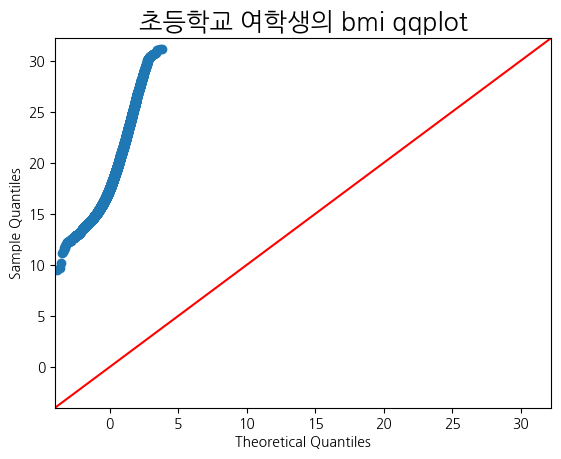

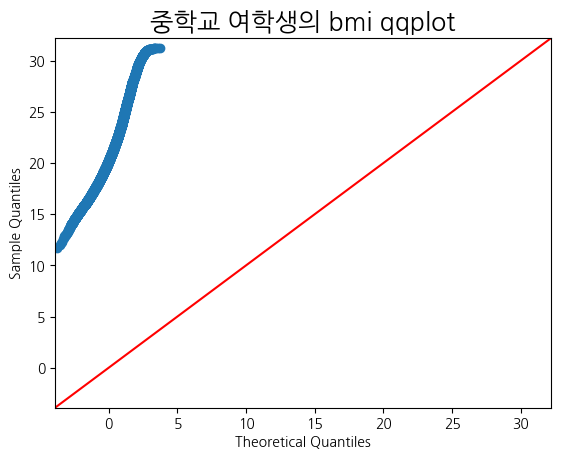

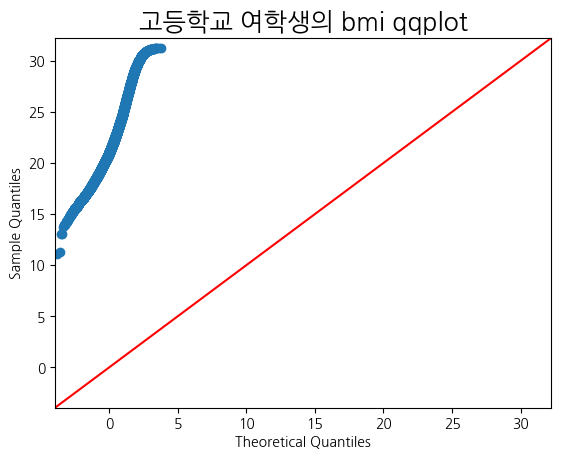

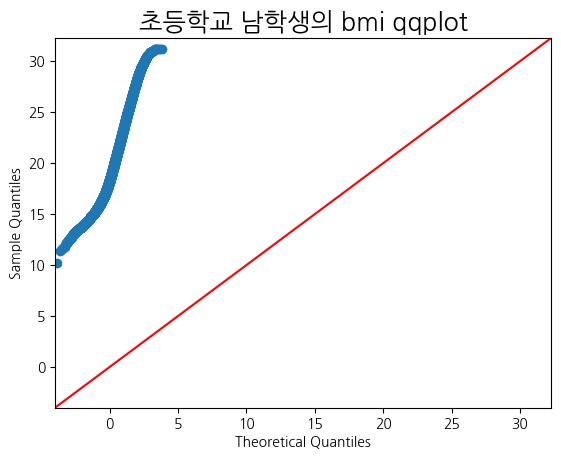

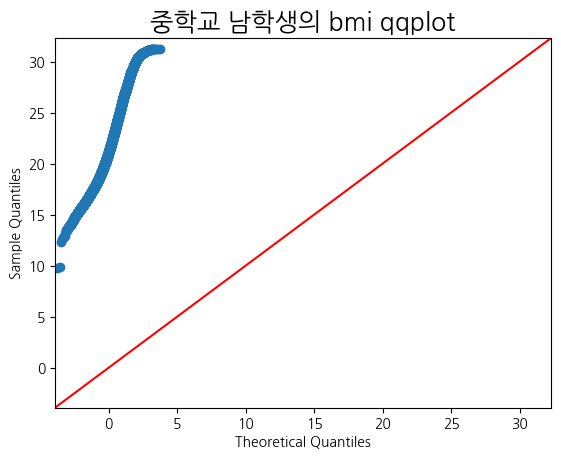

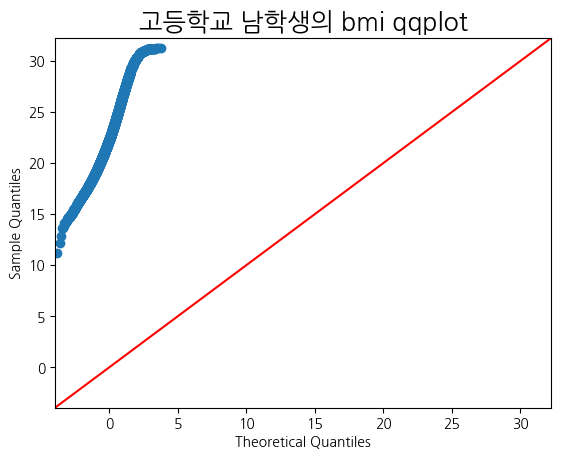

In [36]:
#BMI의 정규성을 QQ-PLOT으로 파악
import statsmodels.api as sm

sm.qqplot(bmi_wel_bmi, line='45')
plt.title("초등학교 여학생의 bmi qqplot", fontsize=18)

sm.qqplot(bmi_wmid_bmi, line='45')
plt.title("중학교 여학생의 bmi qqplot", fontsize=18)

sm.qqplot(bmi_whigh_bmi, line='45')
plt.title("고등학교 여학생의 bmi qqplot", fontsize=18)

sm.qqplot(bmi_mel_bmi, line='45')
plt.title("초등학교 남학생의 bmi qqplot", fontsize=18)

sm.qqplot(bmi_mmid_bmi, line='45')
plt.title("중학교 남학생의 bmi qqplot", fontsize=18)

sm.qqplot(bmi_mhigh_bmi, line='45')
plt.title("고등학교 남학생의 bmi qqplot", fontsize=18)
# 결과 모든 그룹이 정규성을 띄지 않는 것으로 파악됨

In [37]:
# 6가지 그룹에 대한 정규성 검사 - shapiro test
# 초등학교 여학생의 경우
from scipy.stats import shapiro
stat1, pvalue1 = shapiro(bmi_wel_bmi)
print(f"초등학교 여학생의 경우 : Statistic = {stat1:.4f}, p-value = {pvalue1:.4f}")
if pvalue1 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 중학교 여학생의 경우
stat2, pvalue2 = shapiro(bmi_wmid_bmi)
print(f"중학교 여학생의 경우 : Statistic = {stat2:.4f}, p-value = {pvalue2:.4f}")
if pvalue2 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 고등학교 여학생의 경우
stat3, pvalue3 = shapiro(bmi_whigh_bmi)
print(f"고등학교 여학생의 경우 : Statistic = {stat3:.4f}, p-value = {pvalue3:.4f}")
if pvalue3 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 초등학교 남학생의 경우
stat4, pvalue4 = shapiro(bmi_mel_bmi)
print(f"초등학교 남학생의 경우 : Statistic = {stat4:.4f}, p-value = {pvalue4:.4f}")
if pvalue4 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 중학교 남학생의 경우
stat4, pvalue5 = shapiro(bmi_mmid_bmi)
print(f"중학교 남학생의 경우 : Statistic = {stat4:.4f}, p-value = {pvalue4:.4f}")
if pvalue4 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 고등학교 남학생의 경우
stat4, pvalue6 = shapiro(bmi_mhigh_bmi)
print(f"고등학교 남학생의 경우 : Statistic = {stat4:.4f}, p-value = {pvalue4:.4f}")
if pvalue4 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")
# 검사 결과 6가지 그룹 모두 정규성을 띄지 않는다 파악이 되었으나 shapiro 검정을 실행하는 경우 표본의 수가 커 정확도가 떨어지기에 다른 검정 필요

초등학교 여학생의 경우 : Statistic = 0.9417, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
중학교 여학생의 경우 : Statistic = 0.9644, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
고등학교 여학생의 경우 : Statistic = 0.9648, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
초등학교 남학생의 경우 : Statistic = 0.9466, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
중학교 남학생의 경우 : Statistic = 0.9701, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
고등학교 남학생의 경우 : Statistic = 0.9812, p-value = 0.0000
 -> 정규성을 따르지 않습니다.


c:\Users\parkd\anaconda3\envs\sda2024\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
# 6가지 그룹에 대한 정규성 검사 - KS test
from scipy.stats import kstest
from scipy.stats import norm
import statistics
stat1, pvalue1 = kstest(bmi_wel_bmi, norm.rvs(loc=statistics.mean(bmi_wel_bmi), scale=statistics.variance(bmi_wel_bmi), size=42354))
print(f"초등학교 여학생의 경우 : Statistic = {stat1:.4f}, p-value = {pvalue1:.4f}")
if pvalue1 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

stat2, pvalue2 = kstest(bmi_wmid_bmi, norm.rvs(loc=statistics.mean(bmi_wmid_bmi), scale=statistics.variance(bmi_wmid_bmi), size=20036))
print(f"중학교 여학생의 경우 : Statistic = {stat2:.4f}, p-value = {pvalue2:.4f}")
if pvalue2 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

stat3, pvalue3 = kstest(bmi_whigh_bmi, norm.rvs(loc=statistics.mean(bmi_whigh_bmi), scale=statistics.variance(bmi_whigh_bmi), size=15881))
print(f"고등학교 여학생의 경우 : Statistic = {stat3:.4f}, p-value = {pvalue3:.4f}")
if pvalue3 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

stat4, pvalue4 = kstest(bmi_mel_bmi, norm.rvs(loc=statistics.mean(bmi_mel_bmi), scale=statistics.variance(bmi_mel_bmi), size=11095))
print(f"초등학교 남학생의 경우 : Statistic = {stat4:.4f}, p-value = {pvalue4:.4f}")
if pvalue4 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

stat5, pvalue5 = kstest(bmi_mmid_bmi, norm.rvs(loc=statistics.mean(bmi_mmid_bmi), scale=statistics.variance(bmi_mmid_bmi), size=11095))
print(f"중학교 남학생의 경우 : Statistic = {stat5:.4f}, p-value = {pvalue5:.4f}")
if pvalue5 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

stat6, pvalue6 = kstest(bmi_mhigh_bmi, norm.rvs(loc=statistics.mean(bmi_mhigh_bmi), scale=statistics.variance(bmi_mhigh_bmi), size=11095))
print(f"고등학교 남학생의 경우 : Statistic = {stat6:.4f}, p-value = {pvalue6:.4f}")
if pvalue6 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")    
# 검사 결과 6가지 그룹 모두 정규성을 띄지 않는다 파악됨

초등학교 여학생의 경우 : Statistic = 0.3189, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
중학교 여학생의 경우 : Statistic = 0.3043, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
고등학교 여학생의 경우 : Statistic = 0.2996, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
초등학교 남학생의 경우 : Statistic = 0.3432, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
중학교 남학생의 경우 : Statistic = 0.3339, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
고등학교 남학생의 경우 : Statistic = 0.3052, p-value = 0.0000
 -> 정규성을 따르지 않습니다.


In [39]:
# 6가지 그룹의 동분산성을 파악 - 정규성을 띄지 않기 때문에 fligner-killeen 검정 사용
from scipy.stats import fligner
stat, p_value = fligner(bmi_wel_bmi, bmi_wmid_bmi, bmi_whigh_bmi, bmi_mel_bmi, bmi_mmid_bmi, bmi_mhigh_bmi)
print("\n[Frigner-Killeen test 결과]")
print(f"Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")
# 결과 그룹 간 분산이 동일치 못하다는 결론 얻음


[Frigner-Killeen test 결과]
Statistic = 948.5000, p-value = 0.0000
 -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).


In [13]:
from scipy.stats import spearmanr
# Kruskal-Wallis H-test 결과 적어도 하나는 유의미한 차이가 있다는 것 파악
# 6가지의 것 중 
# 아침식사 빈도 별 BMI가 정규성을 띄지 않고 동분산성 또한 만족하지 못하기 때문에 Spearman 상관 분석으로 실행
stat1, p_value1 = spearmanr(bmi_wel['아침식사'], bmi_wel['BMI'])
print("\n[Spearman 상관 분석 결과]")
print(f"Statistic = {stat1:.4f}, p-value: {p_value1:.4f}")

if p_value1 < 0.05:
    print(" -> 초등학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.")
else:
    print(" -> 초등학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 없습니다.")

stat2, p_value2 = spearmanr(bmi_wmid['아침식사'], bmi_wmid['BMI'])
print("\n[Spearman 상관 분석 결과]")
print(f"Statistic = {stat2:.4f}, p-value: {p_value2:.4f}")

if p_value2 < 0.05:
    print(" -> 중학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.")
else:
    print(" -> 중학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 없습니다.")

stat3, p_value3 = spearmanr(bmi_whigh['아침식사'], bmi_whigh['BMI'])
print("\n[Spearman 상관 분석 결과]")
print(f"Statistic = {stat3:.4f}, p-value: {p_value3:.4f}")

if p_value3 < 0.05:
    print(" -> 고등학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.")
else:
    print(" -> 고등학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 없습니다.")

stat4, p_value4 = spearmanr(bmi_mel['아침식사'], bmi_mel['BMI'])
print("\n[Spearman 상관 분석 결과]")
print(f"Statistic = {stat4:.4f}, p-value: {p_value4:.4f}")

if p_value4 < 0.05:
    print(" -> 초등학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.")
else:
    print(" -> 초등학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 없습니다.")

stat5, p_value5 = spearmanr(bmi_mmid['아침식사'], bmi_mmid['BMI'])
print("\n[Spearman 상관 분석 결과]")
print(f"Statistic = {stat5:.4f}, p-value: {p_value5:.4f}")

if p_value5 < 0.05:
    print(" -> 중학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.")
else:
    print(" -> 중학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 없습니다.")

stat6, p_value6 = spearmanr(bmi_mhigh['아침식사'], bmi_mhigh['BMI'])
print("\n[Spearman 상관 분석 결과]")
print(f"Statistic = {stat6:.4f}, p-value: {p_value6:.4f}")

if p_value6 < 0.05:
    print(" -> 고등학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.")
else:
    print(" -> 고등학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 없습니다.")

# 결과 모든 그룹에서 유의미한 상관관계가 있다 파악


[Spearman 상관 분석 결과]
Statistic = -0.0917, p-value: 0.0000
 -> 초등학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.

[Spearman 상관 분석 결과]
Statistic = -0.0920, p-value: 0.0000
 -> 중학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.

[Spearman 상관 분석 결과]
Statistic = -0.0368, p-value: 0.0000
 -> 고등학교 여학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.

[Spearman 상관 분석 결과]
Statistic = -0.0644, p-value: 0.0000
 -> 초등학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.

[Spearman 상관 분석 결과]
Statistic = -0.0471, p-value: 0.0000
 -> 중학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.

[Spearman 상관 분석 결과]
Statistic = -0.0280, p-value: 0.0012
 -> 고등학교 남학생의 경우 아침식사 빈도와 BMI 간에 유의미한 상관 관계가 있습니다.
